# Debugging and Testing

<div class="alert alert-info">

### Aims:
 - Understand the importance of debugging
 - Learn some debugging techniques
 - Learn the basics of `pdb`
 - Creating tests
 - Automatic documentation

<div class="alert alert-info">

### Notes

- Some of the material presented in today's lecture has been adapted from `SciPy`'s debugging lecture found [here](http://scipy-lectures.org/advanced/debugging/index.html).

- Scripts for todays lecture can be found in the `files` folder within `Lecture04`.

When developing software it's often the case that you'll spend as much (if not more!) time debugging, compared to writing, 'actual' code. This statement alone should make one thing abundantly clear: debugging is important and in order to increase your productivity you _need_ to get good at it.

Over the course of time, as you develop/encounter code with bugs, fix them and repeat this process countless times, these are skills you will be 'forced' to acquire naturally. But as with everything, when starting out it doesn't hurt to get a few tips from sources who have spent too much time searching for that elusive typo in the middle of a million lines of code. Thus, this lecture aims to provide you with a few tips and tricks to help you on your journey to becoming a debugging guru.

A funny salt gun advert...

<img src="figures/ldbp1.png" width=500 height=1000 />

This lectures advert...

<img src="figures/ldbp2.png" width=500 height=1000 />

## Debugging in Python

This lecture focuses on debugging in Python. While the general skill set is transferable to any coding language, some of the tools are not. Similar tools will however, generally, be available in other languages. For example, today we will the the Python debugger, `pdb`, in action. Later in the course, when some of you encounter `C++`, a comparable tool is the GNU debugger, `gdb`.  

### Infamous 'bugs'

There have been some infamous 'bugs' throughout history, here are a few:

#### _The world's first computer bug?_

On September 9th, 1947 at 3:45 p.m., Grace Murray Hopper logged in her log book the first computer bug! Her log read: "First actual case of bug being found". The term "bug" in computer science is now, of course, not taken literally. It is used to describe a flaw or failure in a computer program that causes it to produce an unexpected result or crash.

#### _The Y2K bug_

The *year 2000* problem spawned fears of worldwide economic collapse, nuclear war, and led to an industry of consultants providing last-minute fixes.

Scary stuff, but clearly a bit over exaggerated. Nevertheless, the bug was real and billions of dollars were spend world wide fixing the bug. Indeed, not all systems were fixed in time and in Spain some parking meters failed, the French meteorological institute published the weather for 19100 and in Australia some ticket validation machines failed.

#### _The Dhahran Missile_

But on a more serious note, a bug in the software of an MIM-104 Patriot caused its system clock to drift by one third of a second over a period of one hundred hours - resulting in failure to locate and intercept an incoming Iraqi Al Hussein missile, which then struck Dhahran barracks, Saudi Arabia (February 25, 1991), killing 28 Americans.

And here are some of the more 'interesting' bugs you may encounter while developing software:

#### _The Heisenbug_

From [Wikipedia](https://en.wikipedia.org/wiki/Heisenbug#See_also):

_In computer programming jargon, a heisenbug is a software bug that seems to disappear or alter its behavior when one attempts to study it. The term is a pun on the name of Werner Heisenberg, the physicist who first asserted the observer effect of quantum mechanics, which states that the act of observing a system inevitably alters its state. In electronics the traditional term is probe effect, where attaching a test probe to a device changes its behavior._

#### _Mandelbug_

Mandelbugs do not change their properties or vanish like Heisenbugs. Instead, they are so unusual and complex that there is typically no practical solution to fix them. In fact, Mandelbugs may be so nondeterministic that many scholarly developers believe that fractal mathematics inventor Benoit Mandelbrot developed the Mandelbug to drive developers insane.

#### _Bohrbug_

A software bug which manifests reliably under a well-defined, but possibly unknown, set of conditions.

#### _Schroedinbug_

A software bug which manifests only when somebody debugging it finds out that it shouldn't work at all.

## Python tracebacks

Lets first focus on bugs that result in exceptions being raised in your python code - that is, your code doesn't complete and exits with a traceback. Initially, you'll probably spend a good deal of time fixing bugs of this form!

Lets consider a code snippet:

In [2]:
import numpy as np

def a(b):
    return np.sin(np.exp(b))

print(a(1))

0.41078129050290885


The first part of the the error message reads:

```Python
---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
```

The first piece of the message reads `NameError`. This tells us the type of exception that has occurred. From Python's documentation:

```python
exception NameError

    Raised when a local or global name is not found. This applies only to unqualified names. The associated value is an error message that includes the name that could not be found.

    The name attribute can be set using a keyword-only argument to the constructor. When set it represent the name of the variable that was attempted to be accessed.
```

There we go. We're trying to use something in our code that we haven't defined!
Python has a large range of built-in exceptions that will generate tracebacks. See the documentation [here](https://docs.python.org/3/library/exceptions.html). Note that we can also define our own exceptions if required!

Lets continue analysing the traceback. Next it tells us `Traceback (most recent call last)` - that is, the last line shown in the traceback is where the exception occurred. This line may or may not be source of the bug, but is often a good place to start looking. Hence, tracebacks should generally be read from 'bottom-to-top' when debugging. (For explanatory purposes, we'll read this one from top-to-bottom though).

Next, we have the start of the call sequence that resulted in the exception:

```python
<ipython-input-1-de1318aa6e4d> in <module>
      4     return np.sin(exp(b))
      5 
----> 6 print(a(1))
```

This is telling us that `print(a(1))` has been called successfully (since the traceback doesn't end there), along with what line of code the call was made from and from which module. Since the exception occurs in a small snippet of code with in a Jupyter notebook, the information is not 'super useful', but we'll see some cases later where it is.

Next we have

```python
<ipython-input-1-de1318aa6e4d> in a(b)
      2 
      3 def a(b):
----> 4     return np.sin(exp(b))
      5 
      6 print(a(1))

NameError: name 'exp' is not defined
```

Next, the traceback is telling us that on line 4, `exp` is not defined and is hence resulting in a `NameError` exception. The exponential function we're looking for is defined within `NumPy` and hence if we modify line 4 to `return np.sin(np.exp(b))` all should hopefully be good!

Now we've seen en example, lets put a slightly more rigorous definition of tracebacks in place. In Python, tracebacks are reports containing the function calls made in your code at a specific point. When an exception is raised, the traceback will provide information about what has gone wrong. Tracebacks are important, and very useful pieces of information to help you debug. In python, they tend to be more helpful than in many other coding languages!

#### Exercise

To understand tracebacks, we first need to understand what leads to the different exceptions we may encounter. Can you write some code snippets to generate the following exceptions:

1. `ImportError`
2. `ModuleNotFoundError`
3. `ZeroDivisionError`
4. `IndexError`
5. `TypeError`
6. `SyntaxError`
7. `IndentationError`
8. `RecursionError`

In [20]:
# 1. ImportError
import torch

ModuleNotFoundError: No module named 'torch'

In [21]:
# 2. ModuleNotFoundError
import torch

ModuleNotFoundError: No module named 'torch'

In [6]:
# 3. ZeroDivisionError
1 / 0

ZeroDivisionError: division by zero

In [7]:
# 4. IndexError
a = np.arange(9)

print(a[10])

IndexError: index 10 is out of bounds for axis 0 with size 9

In [8]:
# 5. TypeError
b = (1, 2)

b.append(1)

AttributeError: 'tuple' object has no attribute 'append'

In [23]:
# 6. SyntaxError
1 && 2

SyntaxError: invalid syntax (828227393.py, line 2)

In [14]:
# 7. IndentationError
for i in range(5):
    i += 1
 print(i)

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 4)

In [26]:
# 8. RecursionError
def func(x):
    return func(x)

func(1)

RecursionError: maximum recursion depth exceeded

## Fast static analysis

They are several static analysis tools in Python; to name a few:
- [pylint](https://pypi.org/project/pylint/)
- [pychecker](https://pypi.org/project/PyChecker/)
- [pyflakes](https://pypi.org/project/pyflakes/)
- [flake8](https://pypi.org/project/flake8/)

There are often notebook versions/extensions of these packages, e.g.
- [flake8-nb](https://pypi.org/project/flake8-nb/)

The simplest of these tools is probably `pyflakes`:
- Fast, simple
- Detects syntax errors, missing imports, typos on names.

Another good recommendation (and my personal favorite) is the `flake8` tool. This tool is a combination of `pyflakes` and `pep8`. Thus, in addition to the types of errors that `pyflakes` catches, `flake8` detects violations of the recommendation in `PEP8` style guide.

Integrating `pyflakes` (or `flake8`) in your editor or IDE is highly recommended, it does yield productivity gains.

## Debugging workflow

If you do have a non trivial bug, this is when debugging strategies kick in. There is no silver bullet. Yet, strategies help:

For debugging a given problem, the favorable situation is when the problem is isolated in a small number of lines of code, outside framework or application code, with short modify-run-fail cycles
- Make it fail reliably. Find a test case that makes the code fail (in the same way) every time.
- Divide and Conquer. Once you have a failing test case, isolate the failing code.
    - Which module.
    - Which function.
    - Which line of code.

=> isolate a small reproducible failure: a test case/minimum failing example
- Change one thing at a time and re-run the failing test case.
- Use the debugger to understand what is going wrong.
- Take notes and be patient. It may take a while.

**Note**: Once you have gone through this process: isolated a tight piece of code reproducing the bug and fix the bug using this piece of code, add the corresponding code to your test suite.

## Minimum failing examples

Given the occurrence of a particular bug, a minimum failing example (MFE) is the simplest piece of code that can reproduce an instance of the particular bug in question (which was probably discovered through building a larger more complex script).

When approaching someone for help debugging a problem, it is considered good practice to provide them with an MFE. This will often drastically reduce the time taken for them to debug the problem. Further, when contributing to an open source project and reporting a problem (e.g. opening a bug report issue on Github), the developers will frequently ask 'Please could you provide an MFE'.

#### Example:

This is a 'real' example. (Don't worry about the details, this is just to illustrate and idea). I was once sent this long bit of code:

```python
import numpy                   as np
import matplotlib.pyplot       as plot
import math                    as mt
import matplotlib.ticker       as mticker    
from   mpl_toolkits.axes_grid1 import make_axes_locatable
from   matplotlib              import cm
from   scipy.interpolate       import CubicSpline
from   scipy.interpolate       import interp1d
from   devito import *

from   examples.seismic        import TimeAxis
from   examples.seismic        import RickerSource
from   examples.seismic        import Receiver

nptx   = 861
nptz   = 311
x0     = 13650.
x1     = 56650. 
compx  = x1-x0
z0     = 0.
z1     = 9920.
compz  = z1-z0;
hxv    = (x1-x0)/(nptx-1)
hzv    = (z1-z0)/(nptz-1)

npmlx  = 30
npmlz  = 31

lx = npmlx*hxv
lz = npmlz*hzv

origin  = (x0,z0)
extent  = (compx,compz)
shape   = (nptx,nptz)
spacing = (hxv,hzv)

class d0domain(SubDomain):
    name = 'd0'
    def define(self, dimensions):
        x, z = dimensions
        return {x: ('middle', npmlx, npmlx), z: ('middle', 0, npmlz)}
d0_domain = d0domain()

class d1domain(SubDomain):
    name = 'd1'
    def define(self, dimensions):
        x, z = dimensions
        return {x: ('left',npmlx), z: z}
d1_domain = d1domain()

class d2domain(SubDomain):
    name = 'd2'
    def define(self, dimensions):
        x, z = dimensions
        return {x: ('right',npmlx), z: z}
d2_domain = d2domain()

class d3domain(SubDomain):
    name = 'd3'
    def define(self, dimensions):
        x, z = dimensions
        return {x: ('middle', npmlx, npmlx), z: ('right',nptz)}
d3_domain = d3domain()

grid = Grid(origin=origin,extent=extent,shape=shape,subdomains=(d0_domain,d1_domain,d2_domain,d3_domain),dtype=np.float64) 

nptxvel = 1407
nptzvel = 311
x0vel   = 0.        
x1vel   = 70300.     
z0vel   = 0.        
z1vel   = 9920.
hxvel   = (x1vel-x0vel)/(nptxvel-1)
hzvel   = (z1vel-z0vel)/(nptzvel-1)
Xvel    = np.linspace(x0vel,x1vel,nptxvel)
Zvel    = np.linspace(z0vel,z1vel,nptzvel)
velarq = np.fromfile('velocity_data/profilevel.bin',dtype='float32')
velarq = velarq.reshape((nptxvel,nptzvel))
fscale = 10**(-3) 
velarq = fscale*velarq

X0 = np.linspace(x0,x1,nptx)   
Z0 = np.linspace(z0,z1,nptz)
X1 = np.linspace((x0+0.5*hxv),(x1-0.5*hxv),nptx-1)
Z1 = np.linspace((z0+0.5*hzv),(z1-0.5*hzv),nptz-1)
v0 = np.zeros((nptx,nptz))
v1 = np.zeros((nptx-1,nptz-1))

C0x = np.zeros((nptx,nptzvel))
for j in range(nptzvel):
    x = Xvel
    z = velarq[0:nptxvel,j]
    #cs = CubicSpline(x,z)    
    cs = interp1d(x,z,kind='linear')
    xs = X0
    C0x[0:nptx,j] = cs(xs)
    
for i in range(nptx):
    x = Zvel
    z = C0x[i,0:nptzvel]
    #cs = CubicSpline(x,z)
    cs = interp1d(x,z,kind='linear')
    xs = Z0
    v0[i,0:nptz] = cs(xs)
          
C11x = np.zeros((nptx-1,nptzvel))
for j in range(nptzvel):
    x = Xvel
    z = velarq[0:nptxvel,j]
    cs = CubicSpline(x,z)
    xs = X1
    C11x[0:nptx-1,j] = cs(xs)
    
for i in range(nptx-1):
    x  = Zvel
    z  = C11x[i,0:nptzvel]
    #cs = CubicSpline(x,z)
    cs = interp1d(x,z,kind='linear')
    xs = Z1
    v1[i,0:nptz-1] = cs(xs)

t0 = 0.
tn = 20000.   
CFL = 0.4
vmax  = np.amax(v0) 
dtmax = np.float64((min(hxv,hzv)*CFL)/(vmax))
ntmax = int((tn-t0)/dtmax)+1
dt0   = np.float64((tn-t0)/ntmax)

time_range = TimeAxis(start=t0,stop=tn,num=ntmax+1)
nt         = time_range.num - 1

(hx,hz) = grid.spacing_map  
(x, z)  = grid.dimensions     
t       = grid.stepping_dim
dt      = grid.stepping_dim.spacing

f0     = 0.005
nfonte = 1
xposf  = 35150.
zposf  = 32.

src = RickerSource(name='src',grid=grid,f0=f0,npoint=nfonte,time_range=time_range,staggered=NODE,dtype=np.float64)
src.coordinates.data[:, 0] = xposf
src.coordinates.data[:, 1] = zposf

nrec   = nptx
nxpos  = np.linspace(x0,x1,nrec)
nzpos  = 32.

rec = Receiver(name='rec',grid=grid,npoint=nrec,time_range=time_range,staggered=NODE,dtype=np.float64)
rec.coordinates.data[:, 0] = nxpos
rec.coordinates.data[:, 1] = nzpos

u = TimeFunction(name="u",grid=grid,time_order=2,space_order=2,staggered=NODE,dtype=np.float64)

phi1 = TimeFunction(name="phi1",grid=grid,time_order=2,space_order=2,staggered=(x,z),dtype=np.float64)
phi2 = TimeFunction(name="phi2",grid=grid,time_order=2,space_order=2,staggered=(x,z),dtype=np.float64)

vel0 = Function(name="vel0",grid=grid,space_order=2,staggered=NODE,dtype=np.float64)
vel0.data[:,:] = v0[:,:]

vel1 = Function(name="vel1", grid=grid,space_order=2,staggered=(x,z),dtype=np.float64)
vel1.data[0:nptx-1,0:nptz-1] = v1

vel1.data[nptx-1,0:nptz-1] = vel1.data[nptx-2,0:nptz-1]
vel1.data[0:nptx,nptz-1]   = vel1.data[0:nptx,nptz-2]

src_term = src.inject(field=u.forward,expr=src*dt**2*vel0**2)

rec_term = rec.interpolate(expr=u)

x0pml  = x0 + npmlx*hxv 
x1pml  = x1 - npmlx*hxv 
z0pml  = z0            
z1pml  = z1 - npmlz*hzv 

def fdamp(x,z,i):
    
    quibar  = 0.05
          
    if(i==1):
        a = np.where(x<=x0pml,(np.abs(x-x0pml)/lx),np.where(x>=x1pml,(np.abs(x-x1pml)/lx),0.))
        fdamp = quibar*(a-(1./(2.*np.pi))*np.sin(2.*np.pi*a))
    if(i==2):
        a = np.where(z<=z0pml,(np.abs(z-z0pml)/lz),np.where(z>=z1pml,(np.abs(z-z1pml)/lz),0.))
        fdamp = quibar*(a-(1./(2.*np.pi))*np.sin(2.*np.pi*a))
      
    return fdamp

def generatemdamp():
    
    X0     = np.linspace(x0,x1,nptx)    
    Z0     = np.linspace(z0,z1,nptz)
    X0grid,Z0grid = np.meshgrid(X0,Z0)
    X1   = np.linspace((x0+0.5*hxv),(x1-0.5*hxv),nptx-1)
    Z1   = np.linspace((z0+0.5*hzv),(z1-0.5*hzv),nptz-1)
    X1grid,Z1grid = np.meshgrid(X1,Z1)
   
    D01 = np.zeros((nptx,nptz))
    D02 = np.zeros((nptx,nptz))
    D11 = np.zeros((nptx,nptz))
    D12 = np.zeros((nptx,nptz))
    
    D01 = np.transpose(fdamp(X0grid,Z0grid,1))
    D02 = np.transpose(fdamp(X0grid,Z0grid,2))
  
    D11 = np.transpose(fdamp(X1grid,Z1grid,1))
    D12 = np.transpose(fdamp(X1grid,Z1grid,2))
    
    return D01, D02, D11, D12

D01, D02, D11, D12 = generatemdamp();

dampx0 = Function(name="dampx0", grid=grid,space_order=2,staggered=NODE ,dtype=np.float64)
dampz0 = Function(name="dampz0", grid=grid,space_order=2,staggered=NODE ,dtype=np.float64)
dampx0.data[:,:] = D01
dampz0.data[:,:] = D02

dampx1 = Function(name="dampx1", grid=grid,space_order=2,staggered=(x,z),dtype=np.float64)
dampz1 = Function(name="dampz1", grid=grid,space_order=2,staggered=(x,z),dtype=np.float64)
dampx1.data[0:nptx-1,0:nptz-1] = D11
dampz1.data[0:nptx-1,0:nptz-1] = D12

dampx1.data[nptx-1,0:nptz-1]   = dampx1.data[nptx-2,0:nptz-1]
dampx1.data[0:nptx,nptz-1]     = dampx1.data[0:nptx,nptz-2]
dampz1.data[nptx-1,0:nptz-1]   = dampz1.data[nptx-2,0:nptz-1]
dampz1.data[0:nptx,nptz-1]     = dampz1.data[0:nptx,nptz-2]

# White Region
pde01   = Eq(u.dt2-u.laplace*vel0*vel0) 

# Blue Region
pde02a  = u.dt2   + (dampx0+dampz0)*u.dtc + (dampx0*dampz0)*u - u.laplace*vel0*vel0 
pde02b  = - (0.5/hx)*(phi1[t,x,z-1]+phi1[t,x,z]-phi1[t,x-1,z-1]-phi1[t,x-1,z])
pde02c  = - (0.5/hz)*(phi2[t,x-1,z]+phi2[t,x,z]-phi2[t,x-1,z-1]-phi2[t,x,z-1])
pde02   = Eq(pde02a + pde02b + pde02c)

pde10 = phi1.dt + dampx1*0.5*(phi1.forward+phi1)
a1    = u[t+1,x+1,z] + u[t+1,x+1,z+1] - u[t+1,x,z] - u[t+1,x,z+1] 
a2    = u[t,x+1,z]   + u[t,x+1,z+1]   - u[t,x,z]   - u[t,x,z+1] 
pde11 = -(dampz1-dampx1)*0.5*(0.5/hx)*(a1+a2)*vel1*vel1
pde1  = Eq(pde10+pde11)
                                                    
pde20 = phi2.dt + dampz1*0.5*(phi2.forward+phi2) 
b1    = u[t+1,x,z+1] + u[t+1,x+1,z+1] - u[t+1,x,z] - u[t+1,x+1,z] 
b2    = u[t,x,z+1]   + u[t,x+1,z+1]   - u[t,x,z]   - u[t,x+1,z] 
pde21 = -(dampx1-dampz1)*0.5*(0.5/hz)*(b1+b2)*vel1*vel1
pde2  = Eq(pde20+pde21)

stencil01 =  Eq(u.forward,solve(pde01,u.forward) ,subdomain = grid.subdomains['d0'])

subds = ['d1','d2','d3']

stencil02 = [Eq(u.forward,solve(pde02, u.forward),subdomain = grid.subdomains[subds[i]]) for i in range(0,len(subds))]
stencil1 = [Eq(phi1.forward, solve(pde1,phi1.forward),subdomain = grid.subdomains[subds[i]]) for i in range(0,len(subds))]
stencil2 = [Eq(phi2.forward, solve(pde2,phi2.forward),subdomain = grid.subdomains[subds[i]]) for i in range(0,len(subds))]

bc  = [Eq(u[t+1,0,z],0.),Eq(u[t+1,nptx-1,z],0.),Eq(u[t+1,x,nptz-1],0.),Eq(u[t+1,x,0],u[t+1,x,1])]

op = Operator([stencil01,stencil02] + src_term + bc + [stencil1,stencil2] + rec_term,subs=grid.spacing_map)

u.data[:]     = 0.
phi1.data[:]  = 0.
phi2.data[:]  = 0.

op(time=nt,dt=dt0)

def graph2d(U):    
    plot.figure()
    fscale =  10**(-3)
    scale = np.amax(U[npmlx:-npmlx,0:-npmlz])/50.
    extent = [fscale*x0pml,fscale*x1pml,fscale*z1pml,fscale*z0pml]
    fig = plot.imshow(np.transpose(U[npmlx:-npmlx,0:-npmlz]),vmin=-scale, vmax=scale, cmap=cm.gray, extent=extent)
    plot.gca().xaxis.set_major_formatter(mticker.FormatStrFormatter('%d km'))
    plot.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%d km'))
    plot.axis('equal')
    plot.title('Map - Acoustic Problem with PML - Devito')
    plot.grid()
    ax = plot.gca()
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar = plot.colorbar(fig, cax=cax, format='%.2e')
    cbar.set_label('Displacement [km]')
    plot.draw()
    plot.savefig('acoustic_map_pml_devito.png',dpi=100)
    plot.show()
    
graph2d(u.data[0,:,:])

def graph2drec(rec):    
        fig1 = plot.figure()
        fscale =  10**(-3)
        scale = np.amax(rec[:,npmlx:-npmlx])/50.
        extent = [fscale*x0pml,fscale*x1pml, fscale*tn, fscale*t0]
        fig = plot.imshow(rec[:,npmlx:-npmlx], vmin=-scale, vmax=scale, cmap=cm.gray, extent=extent)
        plot.gca().xaxis.set_major_formatter(mticker.FormatStrFormatter('%d km'))
        plot.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%d s'))
        plot.axis('equal')
        plot.title('Receivers Signal Profile with PML - Devito')
        ax = plot.gca()
        divider = make_axes_locatable(ax)
        plot.savefig('rec_map_pml_devito.png')
        plot.show()

graph2drec(rec.data)
```

which was now producing an incorrect result, but a couple of software versions ago the result was correct.

The above piece of code is long and the offender has not been pin-pointed, thus making it difficult to deduce where the bug is coming from. After some work, I managed to produce an MFE:

```python
import numpy as np
from devito import *
class d0domain(SubDomain):
    name = 'd0'
    def define(self, dimensions):
        x, y = dimensions
        return {x: ('middle', 2, 2), y: ('right', 10)}
sdom = d0domain()
grid = Grid(shape=(10, 10), extent=(10, 10), subdomains=(sdom))
u = Function(name='u', grid=grid)
eq = Eq(u, u+1, subdomain = grid.subdomains['d0'])
op = Operator(eq)
op.apply()
```

This piece of code is short and simple an allowed the bug to be tracked down and fixed in less than an hour!

## Manual debugging

Here are a couple of 'manual' debugging techniques:

- Print statements
Adding print statements to your code can often be a quick and effective method of pin-pointing problematic lines of code, e.g.,
```python
...
x = some_function(inputs)
print(x.proprty1, x.property2)
...
```

- `from IPython import embed; embed()`
When possible, utilizing this command can be an incredibly useful tool for debugging sections of code:
```python
...
x = some_function(inputs)
from IPython import embed; embed()
...
```

I'll now show you a live example!

#### Code for a simple Fourier series

Let $f$ be the function with period $2\pi$ defined on the interval $[-\pi,\pi]$ by:

\begin{equation*}
  f(x)=x^2
\end{equation*}

This function is shown below:

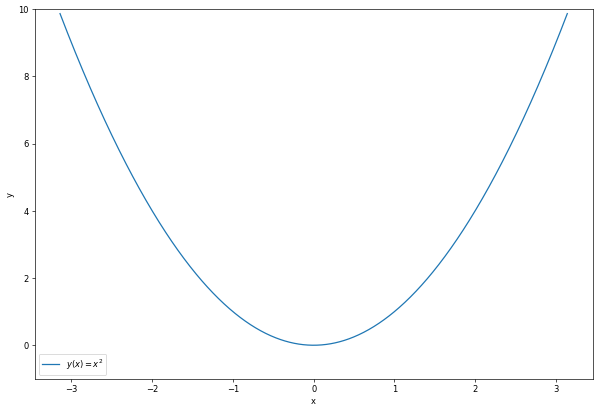

In [27]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

N = 1000
x = np.linspace(-np.pi,np.pi,N)

fig=plt.figure(figsize=(12,8), dpi= 60, facecolor='w', edgecolor='k')
plt.plot(x, x**2, label = "$y(x)=x^2$")
plt.xlabel("x")
plt.ylabel("y")
plt.ylim((-1,10))
plt.legend()
plt.show()

The Fourier series of $x^2$ is:

\begin{align*}
  f(x) &= \frac{a_0}{2}+\sum_{n=1}^{\infty}a_n\cos nx+\sum_{n=1}^{\infty}b_n\sin nx \\
       &= \frac{\pi^2}{3}+4\sum_{n=1}^{\infty}(-1)^n\frac{\cos nx}{n^2} \qquad
  |x|<\pi
\end{align*}

Some code to plot it:

In [ ]:
Nx = 1000
x = np.linspace(-np.pi,np.pi,Nx)

def eval_fc(x,N):
    f = np.pi**2/3
    for i in range(1,N+1):
        f += 4*(-1)**i/i**2*np.cos(i*x)
#         from IPython import embed; embed()
    return f

y1 = eval_fc(x,1)
y2 = eval_fc(x,2)
y3 = eval_fc(x,5)
y4 = eval_fc(x,10)
y5 = eval_fc(x,100)

fig=plt.figure(figsize=(12,8), dpi= 60, facecolor='w', edgecolor='k')
plt.plot(x, y1, label = "$N=1$")
plt.plot(x, y2, label = "$N=2$")
plt.plot(x, y3, label = "$N=5$")
plt.plot(x, y4, label = "$N=10$")
plt.plot(x, y5, label = "$N=100$")
plt.xlabel("x")
plt.ylabel("y")
plt.ylim((-1.0,11.5))
plt.legend()
plt.show()

Oh dear, the result is all wrong...

Lets look at how we could make use of `embed()` and print statements to try and fix this problem!

#### Moving to `.py` files

The same tricks can be used in `.py` files. Lets take a look at an example of this! (We'll simply copy the code cell above into a `.py` file for this!)

## Using the Python debugger

The python debugger, pdb: https://docs.python.org/library/pdb.html, allows you to inspect your code interactively.

Specifically it allows you to:
- View the source code.
- Walk up and down the call stack.
- Inspect values of variables.
- Modify values of variables.
- Set breakpoints.

### Invoking the debugger

Ways to launch the debugger:
1. Postmortem, launch debugger after module errors.
2. Launch the module with the debugger.
3. Call the debugger inside the module

#### Postmortem

**Example 1**: You're working in `IPython` and you get a traceback.

Here we debug the file `index_error.py`. When running it, an `IndexError` is raised. Type `%debug` and drop into the debugger.

-------------------------------------------------------------------
<pre><span></span><span class="gp">In [1]: </span><span class="o">%</span><span class="n">run</span> <span class="n">index_error</span><span class="o">.</span><span class="n">py</span>
<div class="newline"></div><span class="go">---------------------------------------------------------------------------</span>
<div class="newline"></div><span class="go">IndexError                                Traceback (most recent call last)</span>
<div class="newline"></div><span class="go">/home/varoquau/dev/scipy-lecture-notes/advanced/debugging/index_error.py in &lt;module&gt;()</span>
<div class="newline"></div><span class="go">      6</span>
<div class="newline"></div><span class="go">      7 if __name__ == '__main__':</span>
<div class="newline"></div><span class="go">----&gt; 8     index_error()</span>
<div class="newline"></div><span class="go">      9</span>
<div class="newline"></div>
<div class="newline"></div><span class="go">/home/varoquau/dev/scipy-lecture-notes/advanced/debugging/index_error.py in index_error()</span>
<div class="newline"></div><span class="go">      3 def index_error():</span>
<div class="newline"></div><span class="go">      4     lst = list('foobar')</span>
<div class="newline"></div><span class="go">----&gt; 5     print lst[len(lst)]</span>
<div class="newline"></div><span class="go">      6</span>
<div class="newline"></div><span class="go">      7 if __name__ == '__main__':</span>
<div class="newline"></div>
<div class="newline"></div><span class="go">IndexError: list index out of range</span>
<div class="newline"></div>
<div class="newline"></div><span class="gp">In [2]: </span><span class="o">%</span><span class="n">debug</span>
<div class="newline"></div><span class="go">&gt; /home/varoquau/dev/scipy-lecture-notes/advanced/debugging/index_error.py(5)index_error()</span>
<div class="newline"></div><span class="go">      4     lst = list('foobar')</span>
<div class="newline"></div><span class="go">----&gt; 5     print lst[len(lst)]</span>
<div class="newline"></div><span class="go">      6</span>
<div class="newline"></div>
<div class="newline"></div><span class="go">ipdb&gt; list</span>
<div class="newline"></div><span class="go">      1 """Small snippet to raise an IndexError."""</span>
<div class="newline"></div><span class="go">      2</span>
<div class="newline"></div><span class="go">      3 def index_error():</span>
<div class="newline"></div><span class="go">      4     lst = list('foobar')</span>
<div class="newline"></div><span class="go">----&gt; 5     print lst[len(lst)]</span>
<div class="newline"></div><span class="go">      6</span>
<div class="newline"></div><span class="go">      7 if __name__ == '__main__':</span>
<div class="newline"></div><span class="go">      8     index_error()</span>
<div class="newline"></div><span class="go">      9</span>
<div class="newline"></div>
<div class="newline"></div><span class="go">ipdb&gt; len(lst)</span>
<div class="newline"></div><span class="go">6</span>
<div class="newline"></div><span class="go">ipdb&gt; print(lst[len(lst)-1])</span>
<div class="newline"></div><span class="go">r</span>
<div class="newline"></div><span class="go">ipdb&gt; quit</span>
<div class="newline"></div>
<div class="newline"></div><span class="go">In [3]:</span>
<div class="newline"></div></pre>
-------------------------------------------------------------------

**Example 2:** Post-mortem debugging without IPython

In some situations you cannot use IPython, for instance to debug a script that wants to be called from the command line. In this case, you can call the script with `python -m pdb script.py`:

-------------------------------------------------------------------
```bash
$ python -m pdb index_error.py
> /home/varoquau/dev/scipy-lecture-notes/advanced/optimizing/index_error.py(1)<module>()
-> """Small snippet to raise an IndexError."""
(Pdb) continue
Traceback (most recent call last):
File "/usr/lib/python2.6/pdb.py", line 1296, in main
    pdb._runscript(mainpyfile)
File "/usr/lib/python2.6/pdb.py", line 1215, in _runscript
    self.run(statement)
File "/usr/lib/python2.6/bdb.py", line 372, in run
    exec cmd in globals, locals
File "<string>", line 1, in <module>
File "index_error.py", line 8, in <module>
    index_error()
File "index_error.py", line 5, in index_error
    print lst[len(lst)]
IndexError: list index out of range
Uncaught exception. Entering post mortem debugging
Running 'cont' or 'step' will restart the program
> /home/varoquau/dev/scipy-lecture-notes/advanced/optimizing/index_error.py(5)index_error()
-> print(lst[len(lst)])
(Pdb)
```
-------------------------------------------------------------------

#### Step-by-step execution

**Example**: You believe a bug exists in a module but are not sure where.

For instance we are trying to debug `wiener_filtering.py`. Indeed the code runs, but the filtering does not work well.
- Run the script in `IPython` with the debugger using `%run -d wiener_filtering.py` :
-------------------------------------------------------------------
<pre><span></span><span class="gp">In [1]: </span><span class="o">%</span><span class="n">run</span> <span class="o">-</span><span class="n">d</span> <span class="n">wiener_filtering</span><span class="o">.</span><span class="n">py</span>
<div class="newline"></div><span class="go">*** Blank or comment</span>
<div class="newline"></div><span class="go">*** Blank or comment</span>
<div class="newline"></div><span class="go">*** Blank or comment</span>
<div class="newline"></div><span class="go">Breakpoint 1 at /home/varoquau/dev/scipy-lecture-notes/advanced/optimizing/wiener_filtering.py:4</span>
<div class="newline"></div><span class="go">NOTE: Enter 'c' at the ipdb&gt;  prompt to start your script.</span>
<div class="newline"></div><span class="go">&gt; &lt;string&gt;(1)&lt;module&gt;()</span>
<div class="newline"></div></pre>
-------------------------------------------------------------------
- Set a break point at line 34 using `b 34`:
-------------------------------------------------------------------
<div class="highlight-ipython notranslate"><div class="highlight"><pre><span></span><span class="go">ipdb&gt; n</span>
<div class="newline"></div><span class="go">&gt; /home/varoquau/dev/scipy-lecture-notes/advanced/optimizing/wiener_filtering.py(4)&lt;module&gt;()</span>
<div class="newline"></div><span class="go">      3</span>
<div class="newline"></div><span class="go">1---&gt; 4 import numpy as np</span>
<div class="newline"></div><span class="go">      5 import scipy as sp</span>
<div class="newline"></div>
<div class="newline"></div><span class="go">ipdb&gt; b 34</span>
<div class="newline"></div><span class="go">Breakpoint 2 at /home/varoquau/dev/scipy-lecture-notes/advanced/optimizing/wiener_filtering.py:34</span>
<div class="newline"></div></pre></div>
</div>
</li>

-------------------------------------------------------------------
- Continue execution to next breakpoint with `c(ont(inue))`:
-------------------------------------------------------------------
<div class="highlight-ipython notranslate"><div class="highlight"><pre><span></span><span class="go">ipdb&gt; c</span>
<div class="newline"></div><span class="go">&gt; /home/varoquau/dev/scipy-lecture-notes/advanced/optimizing/wiener_filtering.py(34)iterated_wiener()</span>
<div class="newline"></div><span class="go">     33     """</span>
<div class="newline"></div><span class="go">2--&gt; 34     noisy_img = noisy_img</span>
<div class="newline"></div><span class="go">     35     denoised_img = local_mean(noisy_img, size=size)</span>
<div class="newline"></div></pre></div>
</div>
</li>

-------------------------------------------------------------------
- Step into code with `n(ext)` and `s(tep)`: next jumps to the next statement in the current execution context, while step will go across execution contexts, i.e. enable exploring inside function calls:
-------------------------------------------------------------------
<div class="highlight-ipython notranslate"><div class="highlight"><pre><span></span><span class="go">ipdb&gt; s</span>
<div class="newline"></div><span class="go">&gt; /home/varoquau/dev/scipy-lecture-notes/advanced/optimizing/wiener_filtering.py(35)iterated_wiener()</span>
<div class="newline"></div><span class="go">2    34     noisy_img = noisy_img</span>
<div class="newline"></div><span class="go">---&gt; 35     denoised_img = local_mean(noisy_img, size=size)</span>
<div class="newline"></div><span class="go">     36     l_var = local_var(noisy_img, size=size)</span>
<div class="newline"></div>
<div class="newline"></div><span class="go">ipdb&gt; n</span>
<div class="newline"></div><span class="go">&gt; /home/varoquau/dev/scipy-lecture-notes/advanced/optimizing/wiener_filtering.py(36)iterated_wiener()</span>
<div class="newline"></div><span class="go">     35     denoised_img = local_mean(noisy_img, size=size)</span>
<div class="newline"></div><span class="go">---&gt; 36     l_var = local_var(noisy_img, size=size)</span>
<div class="newline"></div><span class="go">     37     for i in range(3):</span>
<div class="newline"></div></pre></div>
</div>
</li>

-------------------------------------------------------------------
- Step a few lines and explore the local variables:
-------------------------------------------------------------------
<div class="highlight-ipython notranslate"><div class="highlight"><pre><span></span><span class="go">ipdb&gt; n</span>
<div class="newline"></div><span class="go">&gt; /home/varoquau/dev/scipy-lecture-notes/advanced/optimizing/wiener_filtering.py(37)iterated_wiener()</span>
<div class="newline"></div><span class="go">     36     l_var = local_var(noisy_img, size=size)</span>
<div class="newline"></div><span class="go">---&gt; 37     for i in range(3):</span>
<div class="newline"></div><span class="go">     38         res = noisy_img - denoised_img</span>
<div class="newline"></div><span class="go">ipdb&gt; print(l_var)</span>
<div class="newline"></div><span class="go">[[5868 5379 5316 ..., 5071 4799 5149]</span>
<div class="newline"></div><span class="go"> [5013  363  437 ...,  346  262 4355]</span>
<div class="newline"></div><span class="go"> [5379  410  344 ...,  392  604 3377]</span>
<div class="newline"></div><span class="go"> ...,</span>
<div class="newline"></div><span class="go"> [ 435  362  308 ...,  275  198 1632]</span>
<div class="newline"></div><span class="go"> [ 548  392  290 ...,  248  263 1653]</span>
<div class="newline"></div><span class="go"> [ 466  789  736 ..., 1835 1725 1940]]</span>
<div class="newline"></div><span class="go">ipdb&gt; print(l_var.min())</span>
<div class="newline"></div><span class="go">0</span>
<div class="newline"></div></pre></div>
</div>
</li>

-------------------------------------------------------------------

Oh dear, nothing but integers, and `0` variation. Here is our bug, we are doing integer arithmetic.

<div class="alert alert-success" role="alert">

When we run the `wiener_filtering.py` file, the following warnings are raised:

<div class="highlight-ipython notranslate"><div class="highlight"><pre><span></span><span class="gp">In [2]: </span><span class="o">%</span><span class="n">run</span> <span class="n">wiener_filtering</span><span class="o">.</span><span class="n">py</span>
<div class="newline"></div><span class="go">wiener_filtering.py:40: RuntimeWarning: divide by zero encountered in divide</span>
<div class="newline"></div><span class="go">    noise_level = (1 - noise/l_var )</span>
<div class="newline"></div></pre></div>
</div>
<p>We can turn these warnings into exceptions, which enables us to do
post-mortem debugging on them, and find our problem quicker:</p>
<div class="highlight-ipython notranslate"><div class="highlight"><pre><span></span><span class="gp">In [3]: </span><span class="n">np</span><span class="o">.</span><span class="n">seterr</span><span class="p">(</span><span class="nb">all</span><span class="o">=</span><span class="s1">'raise'</span><span class="p">)</span>
<div class="newline"></div><span class="gr">Out[3]: </span><span class="p">{</span><span class="s1">'divide'</span><span class="p">:</span> <span class="s1">'print'</span><span class="p">,</span> <span class="s1">'invalid'</span><span class="p">:</span> <span class="s1">'print'</span><span class="p">,</span> <span class="s1">'over'</span><span class="p">:</span> <span class="s1">'print'</span><span class="p">,</span> <span class="s1">'under'</span><span class="p">:</span> <span class="s1">'ignore'</span><span class="p">}</span>
<div class="newline"></div><span class="gp">In [4]: </span><span class="o">%</span><span class="n">run</span> <span class="n">wiener_filtering</span><span class="o">.</span><span class="n">py</span>
<div class="newline"></div><span class="go">---------------------------------------------------------------------------</span>
<div class="newline"></div><span class="go">FloatingPointError                        Traceback (most recent call last)</span>
<div class="newline"></div><span class="go">/home/esc/anaconda/lib/python2.7/site-packages/IPython/utils/py3compat.pyc in execfile(fname, *where)</span>
<div class="newline"></div><span class="go">    176             else:</span>
<div class="newline"></div><span class="go">    177                 filename = fname</span>
<div class="newline"></div><span class="go">--&gt; 178             __builtin__.execfile(filename, *where)</span>
<div class="newline"></div>
<div class="newline"></div><span class="go">/home/esc/physique-cuso-python-2013/scipy-lecture-notes/advanced/debugging/wiener_filtering.py in &lt;module&gt;()</span>
<div class="newline"></div><span class="go">     55 pl.matshow(noisy_face[cut], cmap=pl.cm.gray)</span>
<div class="newline"></div><span class="go">     56</span>
<div class="newline"></div><span class="go">---&gt; 57 denoised_face = iterated_wiener(noisy_face)</span>
<div class="newline"></div><span class="go">     58 pl.matshow(denoised_face[cut], cmap=pl.cm.gray)</span>
<div class="newline"></div><span class="go">     59</span>
<div class="newline"></div>
<div class="newline"></div><span class="go">/home/esc/physique-cuso-python-2013/scipy-lecture-notes/advanced/debugging/wiener_filtering.py in iterated_wiener(noisy_img, size)</span>
<div class="newline"></div><span class="go">     38         res = noisy_img - denoised_img</span>
<div class="newline"></div><span class="go">     39         noise = (res**2).sum()/res.size</span>
<div class="newline"></div><span class="go">---&gt; 40         noise_level = (1 - noise/l_var )</span>
<div class="newline"></div><span class="go">     41         noise_level[noise_level&lt;0] = 0</span>
<div class="newline"></div><span class="go">     42         denoised_img += noise_level*res</span>
<div class="newline"></div>
<div class="newline"></div><span class="go">FloatingPointError: divide by zero encountered in divide</span>
<div class="newline"></div></pre></div>
</div>
</div>

### Other ways of starting a debugger

#### _Raising an exception as a poor man's break point_

If you find it tedious to note the line number to set a break point, you can simply raise an exception at the point that you want to inspect and use `IPython`’s `%debug`. Note that in this case you cannot step or continue the execution.

#### _Debugging test failures in_ `pytest`'s

You can run, e.g., `pytest --pdb my_test.py` to drop in post-mortem debugging on exceptions, and `pytest --pdb-failure` to inspect test failures using the debugger.

This is useful since, owing to the manner in which `pytest` works, we can not `from IPyton embed; embed()` to drop into a test (without messing around more than we'd like).

#### _Calling the debugger explicitly_

Insert the following line where you want to drop in the debugger:

```python
import pdb; pdb.set_trace()
```

We can this command to make use of the debugger within notebooks - similarly to how we made use of IPython's `embed()` previously.

### Graphical debuggers and alternatives

- `pudb` is a good semi-graphical debugger with a text user interface in the console.
- The Visual Studio Code integrated development environment includes a debugging mode.
- The Mu editor is a simple Python editor that includes a debugging mode.

### Debugger commands and interaction

| Command | Description |
| --- | --- |
| l(list) | Lists the code at the current position |
| u(p) | Walk up the call stack |
| d(own) | Walk down the call stack |
| n(ext) | Execute the next line (does not go down in new functions) |
| s(tep) | Execute the next statement (goes down in new functions) |
| bt | Print the call stack |
| a | Print the local variables |
| !command | Execute the given Python command (by opposition to pdb commands |

<div class="alert alert-danger" role="alert">

### Debugger commands are not Python code

You cannot name the variables the way you want. For instance, you cannot override the variables in the current frame with the same name: use different names than your local variable when typing code in the debugger. Not this is different from dropping into embedded `IPython` where you can override existing variables.

### Getting help when in the debugger

Type `h` or `help` to access the interactive help:
<div class="highlight-pycon notranslate" style="position: relative;"><div class="highlight"><pre><span></span><span class="go">ipdb&gt; help</span>
<div class="newline"></div>
<div class="newline"></div><span class="go">Documented commands (type help &lt;topic&gt;):</span>
<div class="newline"></div><span class="go">========================================</span>
<div class="newline"></div><span class="go">EOF    bt         cont      enable  jump  pdef   r        tbreak   w</span>
<div class="newline"></div><span class="go">a      c          continue  exit    l     pdoc   restart  u        whatis</span>
<div class="newline"></div><span class="go">alias  cl         d         h       list  pinfo  return   unalias  where</span>
<div class="newline"></div><span class="go">args   clear      debug     help    n     pp     run      unt</span>
<div class="newline"></div><span class="go">b      commands   disable   ignore  next  q      s        until</span>
<div class="newline"></div><span class="go">break  condition  down      j       p     quit   step     up</span>
<div class="newline"></div>
<div class="newline"></div><span class="go">Miscellaneous help topics:</span>
<div class="newline"></div><span class="go">==========================</span>
<div class="newline"></div><span class="go">exec  pdb</span>
<div class="newline"></div>
<div class="newline"></div><span class="go">Undocumented commands:</span>
<div class="newline"></div><span class="go">======================</span>
<div class="newline"></div><span class="go">retval  rv</span>
<div class="newline"></div></pre></div>
</div>
</div>

<div class="alert alert-success" role="alert">

### Exercise

The following script is well documented and hopefully legible. It
seeks to answer a problem of actual interest for numerical computing,
but it does not work… Can you debug it? How about if you pass the code to ChatGPT and ask it to debug it for you? How does it do?

<p><strong>Python source code of <code class="docutils literal notranslate"><span class="pre">to_debug.py</span></code></span>
<div class="highlight-default notranslate" style="position: relative;"><div class="highlight"><pre><span></span><span class="sd">"""</span>
<div class="newline"></div><span class="sd">A script to compare different root-finding algorithms.</span>
<div class="newline"></div>
<div class="newline"></div><span class="sd">This version of the script is buggy and does not execute. It is your task</span>
<div class="newline"></div><span class="sd">to find an fix these bugs.</span>
<div class="newline"></div>
<div class="newline"></div><span class="sd">The output of the script sould look like:</span>
<div class="newline"></div>
<div class="newline"></div><span class="sd">    Benching 1D root-finder optimizers from scipy.optimize:</span>
<div class="newline"></div><span class="sd">                brenth:   604678 total function calls</span>
<div class="newline"></div><span class="sd">                brentq:   594454 total function calls</span>
<div class="newline"></div><span class="sd">                ridder:   778394 total function calls</span>
<div class="newline"></div><span class="sd">                bisect:  2148380 total function calls</span>
<div class="newline"></div><span class="sd">"""</span>
<div class="newline"></div><span class="kn">from</span> <span class="nn">itertools</span> <span class="k">import</span> <span class="n">product</span>
<div class="newline"></div>
<div class="newline"></div><span class="kn">import</span> <span class="nn">numpy</span> <span class="k">as</span> <span class="nn">np</span>
<div class="newline"></div><span class="kn">from</span> <span class="nn">scipy</span> <span class="k">import</span> <span class="n">optimize</span>
<div class="newline"></div>
<div class="newline"></div><span class="n">FUNCTIONS</span> <span class="o">=</span> <span class="p">(</span><span class="n">np</span><span class="o">.</span><span class="n">tan</span><span class="p">,</span>  <span class="c1"># Dilating map</span>
<div class="newline"></div>             <span class="n">np</span><span class="o">.</span><span class="n">tanh</span><span class="p">,</span> <span class="c1"># Contracting map</span>
<div class="newline"></div>             <span class="k">lambda</span> <span class="n">x</span><span class="p">:</span> <span class="n">x</span><span class="o">**</span><span class="mi">3</span> <span class="o">+</span> <span class="mf">1e-4</span><span class="o">*</span><span class="n">x</span><span class="p">,</span> <span class="c1"># Almost null gradient at the root</span>
<div class="newline"></div>             <span class="k">lambda</span> <span class="n">x</span><span class="p">:</span> <span class="n">x</span><span class="o">+</span><span class="n">np</span><span class="o">.</span><span class="n">sin</span><span class="p">(</span><span class="mi">2</span><span class="o">*</span><span class="n">x</span><span class="p">),</span> <span class="c1"># Non monotonous function</span>
<div class="newline"></div>             <span class="k">lambda</span> <span class="n">x</span><span class="p">:</span> <span class="mf">1.1</span><span class="o">*</span><span class="n">x</span><span class="o">+</span><span class="n">np</span><span class="o">.</span><span class="n">sin</span><span class="p">(</span><span class="mi">4</span><span class="o">*</span><span class="n">x</span><span class="p">),</span> <span class="c1"># Fonction with several local maxima</span>
<div class="newline"></div>            <span class="p">)</span>
<div class="newline"></div>
<div class="newline"></div><span class="n">OPTIMIZERS</span> <span class="o">=</span> <span class="p">(</span><span class="n">optimize</span><span class="o">.</span><span class="n">brenth</span><span class="p">,</span> <span class="n">optimize</span><span class="o">.</span><span class="n">brentq</span><span class="p">,</span> <span class="n">optimize</span><span class="o">.</span><span class="n">ridder</span><span class="p">,</span>
<div class="newline"></div>              <span class="n">optimize</span><span class="o">.</span><span class="n">bisect</span><span class="p">)</span>
<div class="newline"></div>
<div class="newline"></div>
<div class="newline"></div><span class="k">def</span> <span class="nf">apply_optimizer</span><span class="p">(</span><span class="n">optimizer</span><span class="p">,</span> <span class="n">func</span><span class="p">,</span> <span class="n">a</span><span class="p">,</span> <span class="n">b</span><span class="p">):</span>
<div class="newline"></div>    <span class="sd">""" Return the number of function calls given an root-finding optimizer, </span>
<div class="newline"></div><span class="sd">        a function and upper and lower bounds.</span>
<div class="newline"></div><span class="sd">    """</span>
<div class="newline"></div>    <span class="k">return</span> <span class="n">optimizer</span><span class="p">(</span><span class="n">func</span><span class="p">,</span> <span class="n">a</span><span class="p">,</span> <span class="n">b</span><span class="p">,</span> <span class="n">full_output</span><span class="o">=</span><span class="kc">True</span><span class="p">)[</span><span class="mi">1</span><span class="p">]</span><span class="o">.</span><span class="n">function_calls</span><span class="p">,</span>
<div class="newline"></div>
<div class="newline"></div>
<div class="newline"></div><span class="k">def</span> <span class="nf">bench_optimizer</span><span class="p">(</span><span class="n">optimizer</span><span class="p">,</span> <span class="n">param_grid</span><span class="p">):</span>
<div class="newline"></div>    <span class="sd">""" Find roots for all the functions, and upper and lower bounds</span>
<div class="newline"></div><span class="sd">        given and return the total number of function calls.</span>
<div class="newline"></div><span class="sd">    """</span>
<div class="newline"></div>    <span class="k">return</span> <span class="nb">sum</span><span class="p">(</span><span class="n">apply_optimizer</span><span class="p">(</span><span class="n">optimizer</span><span class="p">,</span> <span class="n">func</span><span class="p">,</span> <span class="n">a</span><span class="p">,</span> <span class="n">b</span><span class="p">)</span>
<div class="newline"></div>               <span class="k">for</span> <span class="n">func</span><span class="p">,</span> <span class="n">a</span><span class="p">,</span> <span class="n">b</span> <span class="ow">in</span> <span class="n">param_grid</span><span class="p">)</span>
<div class="newline"></div>
<div class="newline"></div>
<div class="newline"></div><span class="k">def</span> <span class="nf">compare_optimizers</span><span class="p">(</span><span class="n">optimizers</span><span class="p">):</span>
<div class="newline"></div>    <span class="sd">""" Compare all the optimizers given on a grid of a few different</span>
<div class="newline"></div><span class="sd">        functions all admitting a signle root in zero and a upper and</span>
<div class="newline"></div><span class="sd">        lower bounds.</span>
<div class="newline"></div><span class="sd">    """</span>
<div class="newline"></div>    <span class="n">random_a</span> <span class="o">=</span> <span class="o">-</span><span class="mf">1.3</span> <span class="o">+</span> <span class="n">np</span><span class="o">.</span><span class="n">random</span><span class="o">.</span><span class="n">random</span><span class="p">(</span><span class="n">size</span><span class="o">=</span><span class="mi">100</span><span class="p">)</span>
<div class="newline"></div>    <span class="n">random_b</span> <span class="o">=</span>   <span class="o">.</span><span class="mi">3</span> <span class="o">+</span> <span class="n">np</span><span class="o">.</span><span class="n">random</span><span class="o">.</span><span class="n">random</span><span class="p">(</span><span class="n">size</span><span class="o">=</span><span class="mi">100</span><span class="p">)</span>
<div class="newline"></div>    <span class="n">param_grid</span> <span class="o">=</span> <span class="n">product</span><span class="p">(</span><span class="n">FUNCTIONS</span><span class="p">,</span> <span class="n">random_a</span><span class="p">,</span> <span class="n">random_b</span><span class="p">)</span>
<div class="newline"></div>    <span class="nb">print</span><span class="p">(</span><span class="s2">"Benching 1D root-finder optimizers from scipy.optimize:"</span><span class="p">)</span>
<div class="newline"></div>    <span class="k">for</span> <span class="n">optimizer</span> <span class="ow">in</span> <span class="n">OPTIMIZERS</span><span class="p">:</span>
<div class="newline"></div>        <span class="nb">print</span><span class="p">(</span><span class="s1">'</span><span class="si">% 20s</span><span class="s1">: </span><span class="si">% 8i</span><span class="s1"> total function calls'</span> <span class="o">%</span> <span class="p">(</span>
<div class="newline"></div>                    <span class="n">optimizer</span><span class="o">.</span><span class="vm">__name__</span><span class="p">,</span> 
<div class="newline"></div>                    <span class="n">bench_optimizer</span><span class="p">(</span><span class="n">optimizer</span><span class="p">,</span> <span class="n">param_grid</span><span class="p">)</span>
<div class="newline"></div>                <span class="p">))</span>
<div class="newline"></div>
<div class="newline"></div>
<div class="newline"></div><span class="k">if</span> <span class="vm">__name__</span> <span class="o">==</span> <span class="s1">'__main__'</span><span class="p">:</span>
<div class="newline"></div>    <span class="n">compare_optimizers</span><span class="p">(</span><span class="n">OPTIMIZERS</span><span class="p">)</span>
<div class="newline"></div></pre></div>
</div>
</div>
<p></p><div style="clear: both"></div><p></p>
</div>

## Avoiding bugs

- We all, even the great *Fabio Luporini*, write buggy code.
- Keep It Simple, Stupid (KISS):
    - What is the simplest thing that could possibly work?
- Don't Repeat Yourself (DRY):
    - Every piece of knowledge must have a single, unambiguous, authoritative representation within a system.
    - Constants, algorithms, etc.
- Try to limit interdependencies of your code. (Loose Coupling).
- Give your variables, functions and modules meaningful names (not cryptic/mathematics names).
- **Ensure your code is well tested!**
- **Ensure code is documented and that the documentation is correct.**

## Testing

### The many sorts of test

When developing software, opportunities (and often the need) to test appear at many different levels, and these families have developed their own names.

#### Unit tests

Unit tests are small and (ideally) quick tests which verify the behaviour of a single programming "unit" (i.e. a module or function). Thus they ensure that the unit satisfies the "contract" it makes in isolation.

Since the function is tested by itself, rather than on the job, inputs must be "mocked up" (i.e. hardcoded at compile time, or replaced with trivial substitutes) to generate known outputs and external dependencies may be replaced with "test stubs" which short circuit to quickly give the information needed by the unit being tested. Lets look at the example in the `files/unittest` folder of `Lecture04`.

#### Integration tests

Tests which combine multiple program units together and confirm that the interaction proceeds as expected. This might mean chaining multiple functions you write together, or using the real external dependencies rather than the fakes you generated for your unit tests. Integration tests tend exercise more code at once, but are slower to run and can be difficult to write effectively

#### Feature/Functionality tests

Tests which confirm an entire feature is working successfully as a whole, effectively interacting with your software as a user would. For numerical codes, this often involves analytic solutions and/or using simple "toy" problems which are well understood and have nice solutions. For more general software, it might even involve testing human interaction to make sure that GUIs are clear and robust.

Such tests are akin to the tests you wrote during last weeks assignment. In larger projects however, such tests are generally verifying many, many lines of code.

#### Regression tests

Tests which check that fixed bugs stay fixed. I.e. that introducing a new change does not break the existing functionality. The tests may be at the level of the unit, integration or features. If bug reports have a minimal example attached, then this can provide the basis for useful examples for regression testing (this is a form of "red-green" testing similar to test driven development).

### Organising/grouping tests

Recall that during the last weeks `pytest` demo we defined a `class` object when creating our tests file. For small pieces of code this may seem superfluous. However, organising your tests becomes increasingly important as your code base grows.

<div class="alert alert-info">

<h3>Exercise: <code>Test classes</code></h3>

<p>The <b>Lecture04</b> folder contains the folder <b>l4mod</b> within which is the file <b>l4mod.py</b>. Review the code in <b>l4mod.py</b> and then (within the <b>l4mod</b> folder) create a test file. Have this test file contain 2 test classes:</p>
    
<ol>
    <li> <code>class TestUnits(object)</code></li>
    <li> <code>class TestModule(object)</code></li>
</ol>

<p>Add some appropriate tests to each class. Note that you can run the tests contained within a particular <code>class</code> via, e.g., <code>pytest test_<name>.py::TestUnits</code>. Why not also make use of the <a href="https://docs.pytest.org/en/6.2.x/parametrize.html">pytest.mark.parametrize</a> decorator?</p>

<p>Note: Whilst separating tests in this way could be considered 'overkill' for this small piece of code, being able to apply these skills is important since larger projects organise their tests in this way! Take a look at the NumPy test suite <a href="https://github.com/numpy/numpy/tree/main/numpy/tests">here</a>.</p>

</div>

### The `doctest` module

The module [doctest](https://docs.python.org/2/library/doctest.html), from the standard Python library, provides a simple way to include code which is both a test and documentation of an example of the use of your code.

To write a test, one simply copies the input and output that one would see _in the vanilla python interpreter_ pretty much identically into a docstring, whether for a function or module. Consider `docstring_test.py` in the files folder:

```python
import doctest

def mean(x):
    """Mean of a list of numbers.
    
    >>> mean([1, 5, 9)
    5
    
    """
    return sum(x)/len(x)

if __name__ == "__main__":
    import doctest
    doctest.testmod()

```

In this case we can run the test by calling the module as a script:
```bash
python3 -m docstring_test
```

If the test succeeds it silently returns a successful exit code. If the test fails (e.g. we replace the out put of 5.0 in the example) then an error message is printed, looking like the following:

```bash
**********************************************************************
File "docstring_test.py", line 6, in __main__.mean
Failed example:
    mean([1, 5, 9])
Expected:
    3.0
Got:
    5.0
**********************************************************************
1 items had failures:
   1 of   1 in __main__.mean
***Test Failed*** 1 failures.
```

Doctests can also be run in Python on plain text files as

```python
import doctest
doctest.testfile("example.txt")
```
or from the command line as

```bash
python -m doctest example.txt
```

In fact, you can use the same syntax to skip cluttering up your code with the `if __name__ == "__main__":` block in your python modules.

<div class="alert alert-info">

<h3>Exercise: <code>doctest</code></h3>

<p>For each of the functions in <code>l4mod</code>, complete its docstring ensuring a testable usage example is present. Use the doctest module to ensure these 'usage examples' pass/fail as expected.</p>

</div>

### Code coverage.

In general, it is best practice to ensure that your tests exercise every line of your code at least once. This is especially true for interpreted languages like Python, which only checks the syntax of a file (i.e its "grammar") when it is first loaded, but doesn't check that the meaning makes sense.

That means you can write code like the following in a module file and it will load without error

__example.py:__
```python
def f(x):
    return y
```

but trying to actually run it will error out, in this case with a NameError.

```python
import example
example.f(1)
```

returns
```
NameError: name 'y' is not defined
```

There is a Python package, `pytest-cov`, which adds coverage information to `pytest`. Once installed with `pip`, coverage information can be collected for a package or module called `mycoolproject` by calling `pytest` as 

```
python -m pytest --cov=mycoolproject .
```

This will generate output like
```bash
---------- coverage: platform darwin, python 3.6.8-final-0 -----------
Name                               Stmts   Miss  Cover
------------------------------------------------------
mycoolproject/__init__.py              4      0   100%
mycoolproject/analysis.py             33     24    27%
mycoolproject/live.py                 58     40    31%
mycoolproject/tests/test_example.py   11      1    91%
mycoolproject/validator.py            11      0   100%
------------------------------------------------------
TOTAL                                117     65    56%
```

Note that while 100% code coverage is useful, it only means that the code has been run, not that every possible code logic branch has been tested. It is a useful, but neither necessary nor sufficient clue to healthy code.

**Exercise:** Why not try running this with your `l4mod.py` tests?

## Automatic documentation

Documentation is written for three broad groups of people:

1. Users ("I don't care how it does it, I care what it does.")
1. User-Developers ("I build what I need.")
1. Developers ("I make it, but I don't use it.")

These individuals have different needs from the documentation you provide to them. Users want to know what software can do, and how to run it for their own problems. Developers need to understand how code works, but not necessarily what it's intended for in a wider sense. User-developers need to understand both sides. Commercial software is generally written by pure developers, but a lot of scientific software (and many other small projects) is written by user-developers.

For all groups, the most important piece of documentation in Python is the docstring, since it remains with the code it applies to, and connects to the Python online help. For developers & user-developers, additional comments in the body of the source text may also be useful, however users will probably never choose to look there.

Although it is now generally acknowledged that the best place for living documentation is in the source code, near where it applies, since this gives the best probability of developers updating it when they changes, it is still useful to maintain a proper (electronic) manual or write-up0, both for ease of reference, and to give a general project overview.

Several tools have been developed to close this gap by automatically collating comments and function call signatures from the source code and converting it into a human readable document to label as a "manual". Perhaps the most famous open source, cross-language documentation tool is [Doxygen](http://www.doxygen.nl). However we'll look further at a tool called [Sphinx](), which originated in the Python community and is the tool of choice on several large Python projects including SciPy, Django and [Python itself](https://docs.python.org/3/about.html).

### Sphinx

You can install the core Sphinx documentation generation tools with the command

```bash
pip install sphinx
```

Sphinx works by converting [reStructured text](http://docutils.sourceforge.net/docs/user/rst/quickstart.html), whether inside docstrings or in special files into HTML pages or PDF files.

The simplest use pattern is probably to use the automatic scanning tools to collect together all the docstrings into an index of APIs.

This requires creating two files, the first containing the configuration options for the Sphinx tools, and the second containing a skeleton reStructured text file into which to slot the generated documentation:

_`docs/conf.py`_:

```python
import sys
import os

## We're working in the ./docs directory, but need the package root in the path
## This command appends the directory one level up, in a cross-platform way. 
sys.path.insert(0, os.path.abspath(os.sep.join((os.curdir, '..'))))

project = 'MyCoolProject'
extensions = ['sphinx.ext.autodoc',
              'sphinx.ext.napoleon',
              'sphinx.ext.mathjax']
source_suffix = '.rst'
master_doc = 'index'
exclude_patterns = ['_build']
autoclass_content = "both"
```

_`docs/index.rst`_:

```rst
#############
mycoolproject
#############


A heading
---------

This is just example text, perhaps with mathematics like :math:`x^2`, **bold text** and *italics*.
It might also include citations [1]_ inline references to functions like :func:`my_func` or even whole code blocks::

    def my_example(a, b):
        """Do something!"""
        return a**b+1

.. automodule:: mycoolproject
  :members:
  
  
.. rubric:: References
[1] http://www.sphinx-doc.org/en/master/usage/restructuredtext/basics.html#citations
```


With this setup we can build a `html` version of the documentation with the command

```bash
sphinx-build -b html docs docs/html
```

If this is successful, you should be able to open `./docs/html/index.html` to see documentation automatically generated from the docstrings in your project. Sphinx also supports other output formats (for example LaTeX) with the `-b` flag. A recipe to generate a `pdf` manual on a suitably configured system is

```bash
sphinx-build -b latex docs .
pdflatex MyCoolProject.tex
pdflatex MyCoolProject.tex
```

which will generate `MyCoolProject.pdf`. We run LaTeX twice to ensure that references and citations (including the index) are set correctly. 


<div class="alert alert-info">

<h3> Exercise: Autodocumenting your module</h3>

<ul><li> Use <code>pip</code> or <code>conda</code> to install <code>sphinx</code> on your computer. </li>
<li> Create a <code>docs</code> directory inside the <b>l4mod<\b> folder and add <code>conf.py</code> and <code>index.rst</code> files based on the ones given above (edit them as appropriate).</li>
<li> Run <code>sphinx-build</code> to generate <code>html</code> documentation for your project.</li>
<li> Try editting the <code>index.rst</code> file to add more text.</li></ul>
    
</div>

**Note:** A working example of the `l4mod` folder with all exercises complete will be made available later this afternoon!

## Further Reading

- The Pytest [documentation](https://pytest.readthedocs.io/en/latest/).
- The Python documentaion on [doctest](https://docs.python.org/3/library/doctest.html).
- A software carpentry [lecture](https://intermediate-and-advanced-software-carpentry.readthedocs.io/en/latest/testing-python.html) on testing.
- A much fuller [Sphinx tutorial](https://pythonhosted.org/an_example_pypi_project/sphinx.html)